# Tendency budgets in regridded vertical coordinates

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import budgetcalcs as bc
from xhistogram.xarray import histogram
import numpy as np

In [97]:
rootdir = '/archive/gam/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/history/'
filename_native = '08990101.ocean_month.nc'
filename_rho2 = '08990101.ocean_month_rho2.nc'
ds_native = xr.open_dataset(rootdir+filename_native,decode_times=False)
ds_rho2 = xr.open_dataset(rootdir+filename_rho2,decode_times=False)

# Take some subsamples of the output
prof_native = ds_native.sel(xh=-150,yh=20,method='nearest').squeeze()
prof_rho2 = ds_rho2.sel(xh=-150,yh=20,method='nearest').squeeze()

### Plot tendencies as cumulative sums from the bottom
This allows a direct comparison of the native and diagnostic grids.

In [110]:
terms = ['T_advection_xy','Th_tendency_vert_remap','boundary_forcing_heat_tendency','opottempdiff','opottemppmdiff','frazil_heat_tendency']
tend = 'opottemptend'
prof_native_intz = prof_native.cumsum(dim='zl')
prof_rho2_intz = prof_rho2.cumsum(dim='rho2_l')
tendsum_native,error_native = bc.calc_budget(prof_native,terms,tend,vertc='zl',plot=False)
tendsum_rho2,error_rho2 = bc.calc_budget(prof_rho2,terms,tend,vertc='rho2_l',plot=False)

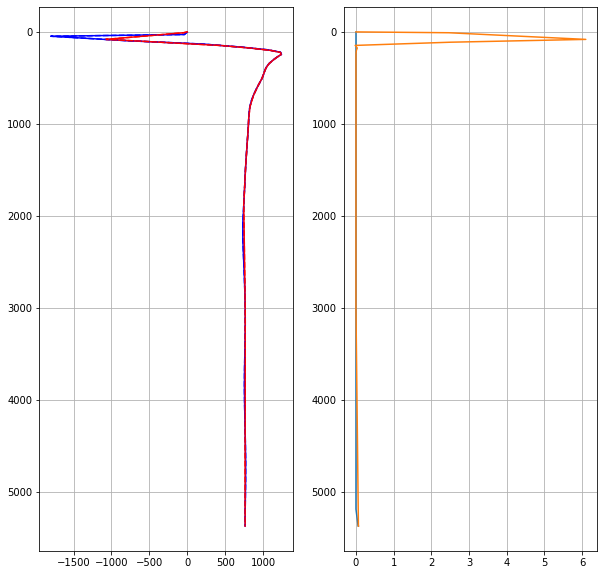

In [111]:
var = terms[0]
fig, ax = plt.subplots(figsize=(10,10),ncols=2)
ax[0].plot(tendsum_native.cumsum(dim='zl'),prof_native_intz.thkcello,color='b')
ax[0].plot(tendsum_rho2.cumsum(dim='rho2_l'),prof_rho2_intz.thkcello,color='r')
ax[0].plot(prof_native_intz[tend],prof_native_intz.thkcello,color='b',linestyle='--')
ax[0].plot(prof_rho2_intz[tend],prof_rho2_intz.thkcello,color='r',linestyle='--')
ax[0].invert_yaxis()
ax[0].grid()
ax[1].plot(error_native.cumsum(dim='zl'),prof_native_intz.thkcello)
ax[1].plot(error_rho2.cumsum(dim='rho2_l'),prof_rho2_intz.thkcello)
ax[1].invert_yaxis()
ax[1].grid()


In [137]:
prof_native = ds_native.sel(xh=-150,yh=20,method='nearest').squeeze()
prof_rho2 = ds_rho2.sel(xh=-150,yh=20,method='nearest').squeeze()
# Get rid of non-unique values in rho2 cell thickness
# Get rid of the zeros first
mask = prof_rho2_intz.thkcello>0
prof_rho2_intz=prof_rho2_intz.where(mask,drop=True)
# Find the non-unique values
thk,indx, = np.unique(prof_rho2_intz.thkcello,return_index=True)
# Assign new coordinates based on cumulative thickness
prof_rho2_intz=prof_rho2_intz.isel(rho2_l=indx).assign_coords(rho2_l=thk)
# Interpolate onto thickness from native grid
prof_rho2_on_native_intz = prof_rho2_intz.interp(rho2_l=prof_native_intz.thkcello,method='cubic')

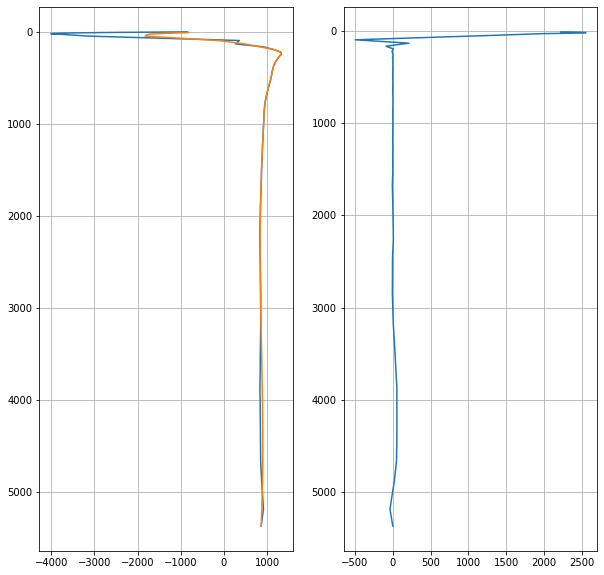

In [142]:
var = terms[0]
fig, ax = plt.subplots(figsize=(10,10),ncols=2)
ax[0].plot(prof_native_intz[var],prof_native_intz.thkcello)
ax[0].plot(prof_rho2_on_native_intz[var],prof_native_intz.thkcello)
ax[0].invert_yaxis()
ax[0].grid()
ax[1].plot(prof_rho2_on_native_intz[var].values-prof_native_intz[var].values,prof_native_intz.thkcello)
ax[1].invert_yaxis()
ax[1].grid()